<a href="https://colab.research.google.com/github/gurnish-singh/machine-learning/blob/master/improving_fashion_classifier_with_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  #tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  #tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3919 - acc: 0.8603
Epoch 2/5
59936/60000 [============================>.] - ETA: 0s - loss: 0.2621 - acc: 0.9044
Reached 90% accuracy so cancelling training!
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2620 - acc: 0.9044


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [22]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 58us/sample - loss: 0.2838 - acc: 0.8930


[0.2838158858060837, 0.893]

In [6]:
print(y_test[0:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [8]:
from tensorflow.keras import models

[<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7feb1de18780>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7feae339a518>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7feae339ac18>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7feae33d3080>, <tensorflow.python.keras.layers.core.Flatten object at 0x7feae33d32b0>, <tensorflow.python.keras.layers.core.Dense object at 0x7feae33d3400>, <tensorflow.python.keras.layers.core.Dense object at 0x7feae33d36d8>]


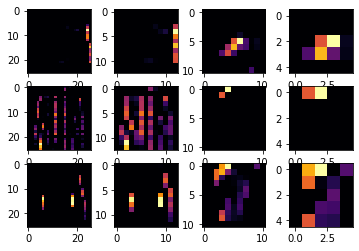

In [19]:
import matplotlib.pyplot as plt
g,axarr=plt.subplots(3,4)
first_image=0
second_image=7
third_image=26
CONVOLUTION_NUMBER=2
from tensorflow.keras import models
layer_outputs=[layer.output for layer in model.layers]
activation_model=tf.keras.models.Model(inputs=model.input,outputs=layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test[first_image].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[second_image].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[third_image].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)
